In [108]:
#데이터 구성 패키지
import pandas as pd
#행렬 연산 패키지
import numpy as np
#데이터 시각화 패키지
import matplotlib
import matplotlib.pyplot as plt
#scale 변환 -> 표준화 회귀계수 산출
from sklearn.preprocessing import StandardScaler


#데이터 분할
from sklearn.model_selection import train_test_split
#LightGBM 패키지 불러오기
from lightgbm import LGBMClassifier

#변수 중요도 확인: F1 점수 기준
from lightgbm import plot_importance
from sklearn.tree import export_graphviz
import graphviz
import seaborn as sns

from subprocess import call
from IPython.display import Image
#로지스틱 회귀
from statsmodels.api import Logit
#분류모델 평가함수
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import accuracy_score, roc_auc_score, precision_score,recall_score, f1_score,roc_curve,auc
from sklearn.metrics import confusion_matrix, classification_report

from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from xgboost import plot_importance

from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier

import scipy.stats as stats

from scipy.stats import chi2_contingency

%matplotlib inline
matplotlib.rc('font',family = 'Noto Sans CJK JP')
#-기호 false다
matplotlib.rc('axes',unicode_minus = False)

In [109]:
df = pd.read_csv("/home/piai/다운로드/control_para.csv", encoding='utf-8')
df

,Unnamed: 0,No_Die,process,type,Temp_OXid,ppm,Pressure,Oxid_time,process 2,N2_HMDS,...,Temp_implantation,Furance_Temp,RTA_Temp,process4.1,Target,Lot_Num,Wafer_Num,Datetime,path,short_path
0,0,NOLSM325131325,Oxidation,dry,1214.307948,26.69,0.203,120,Photo,17.367,...,103.433,854,154,Inspect,141,13,28,01-03-2022,21111,2111
1,1,NOLSM326132326,Oxidation,dry,978.110792,30.86,0.217,137,Photo,16.090,...,105.552,895,156,Inspect,55,13,29,01-03-2022,21122,2112
2,2,NOLSM327133327,Oxidation,dry,1176.019149,31.07,0.218,116,Photo,19.026,...,102.598,898,152,Inspect,96,13,30,01-03-2022,21133,2113
3,3,NOLSM328134328,Oxidation,dry,933.442733,31.04,0.196,143,Photo,18.891,...,102.963,879,155,Inspect,105,13,31,01-03-2022,21111,2111
4,4,NOLSM329135329,Oxidation,wet,1140.598752,31.37,0.215,76,Photo,13.788,...,101.419,882,155,Inspect,79,13,32,01-03-2022,21122,2112
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1663,1663,NOLSM8483211,Oxidation,wet,1275.182502,45.10,0.214,21,Photo,16.029,...,101.503,868,152,Inspect,78,32,11,28-02-2022,33333,3333
1664,1664,NOLSM8493212,Oxidation,wet,1268.105427,45.07,0.215,22,Photo,17.587,...,101.061,867,152,Inspect,42,32,12,28-02-2022,11133,1113
1665,1665,NOLSM8503213,Oxidation,wet,1279.160563,45.12,0.214,21,Photo,16.445,...,101.506,868,152,Inspect,42,32,13,28-02-2022,11222,1122
1666,1666,NOLSM8513214,Oxidation,wet,1272.804948,45.34,0.213,20,Photo,15.306,...,101.360,868,152,Inspect,24,32,14,28-02-2022,11311,1131


In [110]:
def Err(x) :
    if x >= 195 :
        return 1
    else :
        return 0

df['Error']=df['Target'].apply(Err)

In [111]:
df['type'] = df['type'].replace({'dry': 1, 'wet': 0})
df.head()

,Unnamed: 0,No_Die,process,type,Temp_OXid,ppm,Pressure,Oxid_time,process 2,N2_HMDS,...,Furance_Temp,RTA_Temp,process4.1,Target,Lot_Num,Wafer_Num,Datetime,path,short_path,Error
0,0,NOLSM325131325,Oxidation,1,1214.307948,26.69,0.203,120,Photo,17.367,...,854,154,Inspect,141,13,28,01-03-2022,21111,2111,0
1,1,NOLSM326132326,Oxidation,1,978.110792,30.86,0.217,137,Photo,16.090,...,895,156,Inspect,55,13,29,01-03-2022,21122,2112,0
2,2,NOLSM327133327,Oxidation,1,1176.019149,31.07,0.218,116,Photo,19.026,...,898,152,Inspect,96,13,30,01-03-2022,21133,2113,0
3,3,NOLSM328134328,Oxidation,1,933.442733,31.04,0.196,143,Photo,18.891,...,879,155,Inspect,105,13,31,01-03-2022,21111,2111,0
4,4,NOLSM329135329,Oxidation,0,1140.598752,31.37,0.215,76,Photo,13.788,...,882,155,Inspect,79,13,32,01-03-2022,21122,2112,0


In [112]:
df = df.drop(["No_Die", "process","process 2","Process 2-1", "Process 3", "process4", "process4.1", "Target", "Lot_Num", "Wafer_Num", "path", "short_path", "Datetime"], axis=1)
df.head()

,Unnamed: 0,type,Temp_OXid,ppm,Pressure,Oxid_time,N2_HMDS,pressure_HMDS,temp_HMDS,temp_HMDS_bake,...,time_softbake,Wavelength,Energy_Exposure,Temp_Etching,Source_Power,input_Energy,Temp_implantation,Furance_Temp,RTA_Temp,Error
0,0,1,1214.307948,26.69,0.203,120,17.367,15.006,20.001,200.551,...,30.005,365,109.628,72.651,52.103,30795.934,103.433,854,154,0
1,1,1,978.110792,30.86,0.217,137,16.090,15.059,19.993,199.835,...,30.005,405,104.917,70.267,52.004,32135.618,105.552,895,156,0
2,2,1,1176.019149,31.07,0.218,116,19.026,14.930,19.995,202.118,...,30.006,365,106.632,71.231,50.846,31057.895,102.598,898,152,0
3,3,1,933.442733,31.04,0.196,143,18.891,14.947,20.004,194.668,...,30.001,436,108.785,71.295,51.665,32140.566,102.963,879,155,0
4,4,0,1140.598752,31.37,0.215,76,13.788,14.820,19.998,202.192,...,29.988,405,109.913,72.983,50.787,31986.009,101.419,882,155,0


In [59]:
df_raw_x = df.drop("Error", axis = 1, inplace = False)
df_raw_y = df["Error"]

# train_test_split(X: 설명변수 데이터, Y: 목표변수 데이터, test_size = test 데이터 비율, random_state: 랜덤)
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(\
  df_raw_x, df_raw_y, test_size = 0.4, random_state = 1004)

print("분할 전 설명변수 데이터:", df_raw_x.shape)
print("분할 후 설명변수 데이터 : Train", df_train_x.shape," Test", df_test_x.shape)
# test와 train으로 나눔

분할 전 설명변수 데이터: (1668, 25)
분할 후 설명변수 데이터 : Train (1000, 25)  Test (668, 25)


In [60]:
tree_uncust = DecisionTreeClassifier(random_state = 1004)
tree_uncust.fit(df_train_x,df_train_y)
print("Accuracy on training set: {:.3f}".format(tree_uncust.score(df_train_x,df_train_y)))
print("Accuracy on test set:{:.3f}".format(tree_uncust.score(df_test_x, df_test_y)))

Accuracy on training set: 1.000
Accuracy on test set:0.930


In [61]:
print(tree_uncust.get_params().keys())
print(tree_uncust.get_params().values())

dict_keys(['ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'random_state', 'splitter'])
dict_values([0.0, None, 'gini', None, None, None, 0.0, 1, 2, 0.0, 1004, 'best'])


In [62]:
train_accuracy = []; test_accuracy = []
para_depth = [depth for depth in range(1,12)]
for v_max_depth in para_depth:
    tree = DecisionTreeClassifier(max_depth = v_max_depth, random_state = 1004)
    tree.fit(df_train_x,df_train_y)
    train_accuracy.append(tree.score(df_train_x,df_train_y))
    test_accuracy.append(tree.score(df_test_x,df_test_y))
    
df_accuracy_depth = pd.DataFrame()
df_accuracy_depth["Depth"] = para_depth
df_accuracy_depth["TrainAccuracy"] = train_accuracy
df_accuracy_depth["TestAccuracy"] = test_accuracy

In [64]:
df_accuracy_depth.round(3)
# 5 선택

,Depth,TrainAccuracy,TestAccuracy
0,1,0.924,0.933
1,2,0.924,0.933
2,3,0.928,0.924
3,4,0.942,0.928
4,5,0.951,0.942
5,6,0.961,0.930
6,7,0.968,0.930
7,8,0.976,0.928
8,9,0.985,0.931
9,10,0.990,0.933


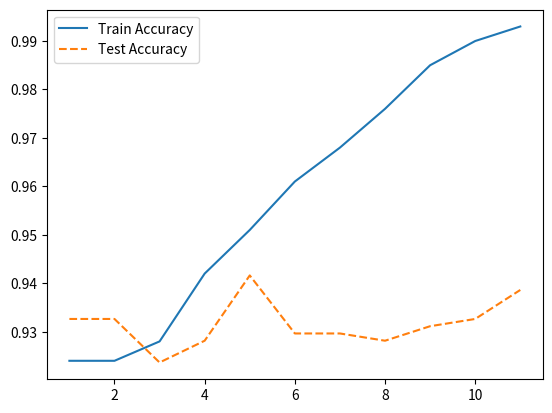

In [65]:
plt.plot(para_depth, train_accuracy,linestyle = "-", label = "Train Accuracy")
plt.plot(para_depth, test_accuracy,linestyle = "--", label = "Test Accuracy")
plt.legend()

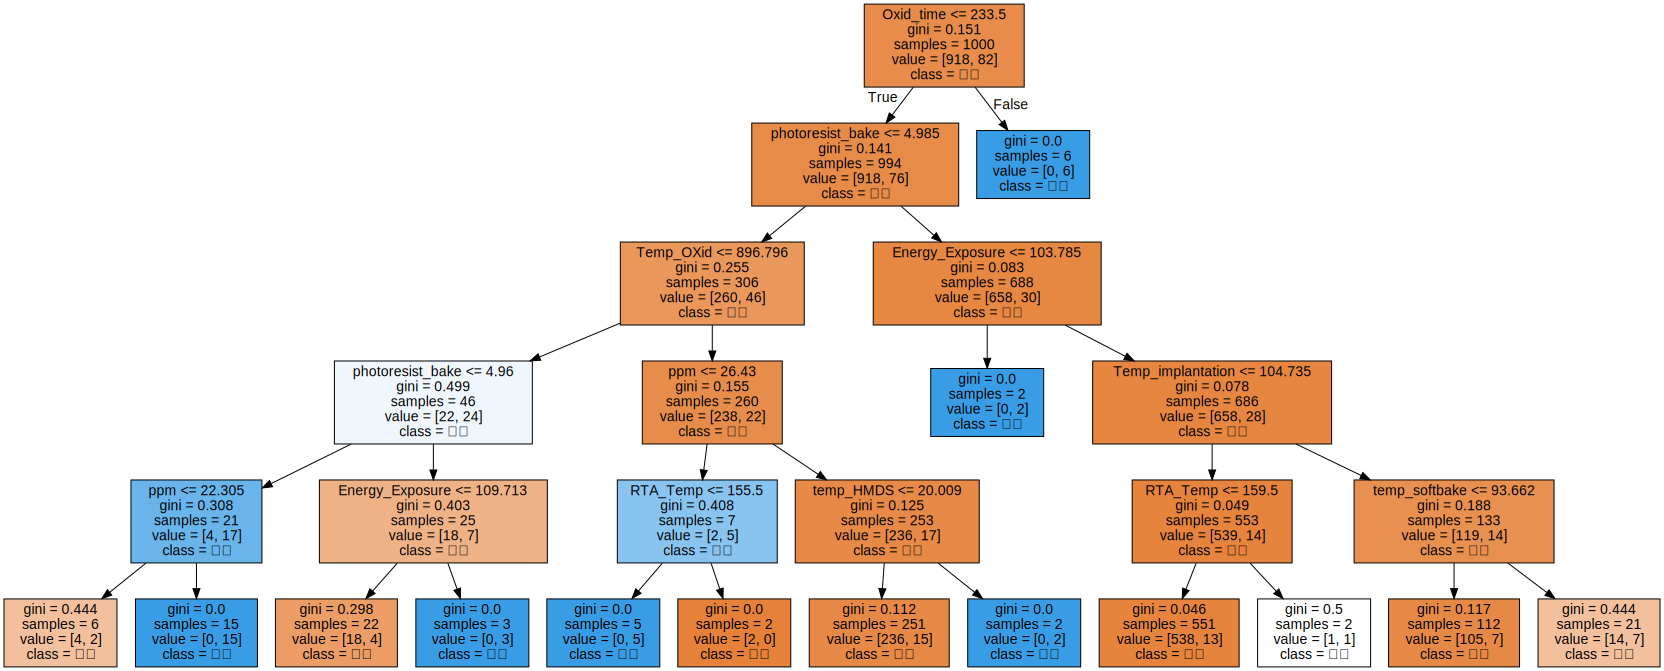

In [66]:
v_feature_name = df_train_x.columns

tree_low = DecisionTreeClassifier(max_depth = 5, random_state =1004)
tree_low.fit(df_train_x, df_train_y)

export_graphviz(tree_low,out_file = "tree_low.dot", class_names = ["양품","불량"], feature_names = v_feature_name, impurity = True, filled = True)
with open("tree_low.dot")as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))


In [67]:
# 분리 노드의 최소 자류 수 변경에 따른 모델 성능 비교를 위한 전체 자료 수 고려
print("전체 자료 = ", df_train_x.shape[0],"개")
print("전체 자료의 1% =",df_train_x.shape[0]*0.01,"개")

train_accuracy = []; test_accuracy = []
para_split = [n_split*10 for n_split in range(2,60)]

# min_sampled_splig 조정
for v_min_samples_split in para_split:
    tree = DecisionTreeClassifier(min_samples_split = v_min_samples_split,max_depth = 5,random_state =1004)
    tree.fit(df_train_x,df_train_y)
    train_accuracy.append(tree.score(df_train_x,df_train_y))
    test_accuracy.append(tree.score(df_test_x,df_test_y))
    
df_accuracy_split = pd.DataFrame()
df_accuracy_split["MinSamplesSplit"] = para_split
df_accuracy_split["TrainAccuracy"] = train_accuracy
df_accuracy_split["TestAccuracy"] = test_accuracy



전체 자료 =  1000 개
전체 자료의 1% = 10.0 개


In [68]:
df_accuracy_split.round(3)
# 유의미한 결과를 위해 20 선택

,MinSamplesSplit,TrainAccuracy,TestAccuracy
0,20,0.949,0.937
1,30,0.944,0.928
2,40,0.944,0.928
3,50,0.933,0.921
4,60,0.933,0.921
5,70,0.933,0.921
6,80,0.933,0.921
7,90,0.933,0.921
8,100,0.933,0.921
9,110,0.933,0.921


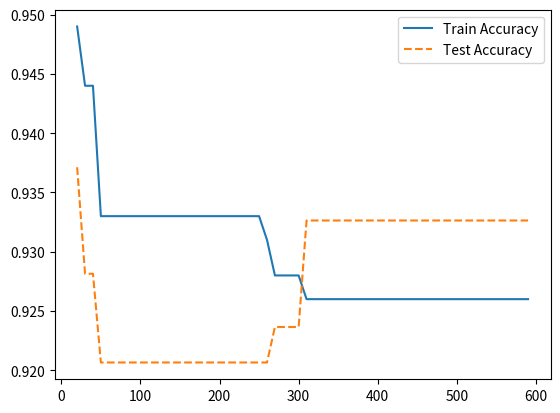

In [69]:
plt.plot(para_split, train_accuracy,linestyle = "-", label = "Train Accuracy")
plt.plot(para_split, test_accuracy,linestyle = "--", label = "Test Accuracy")
plt.legend()

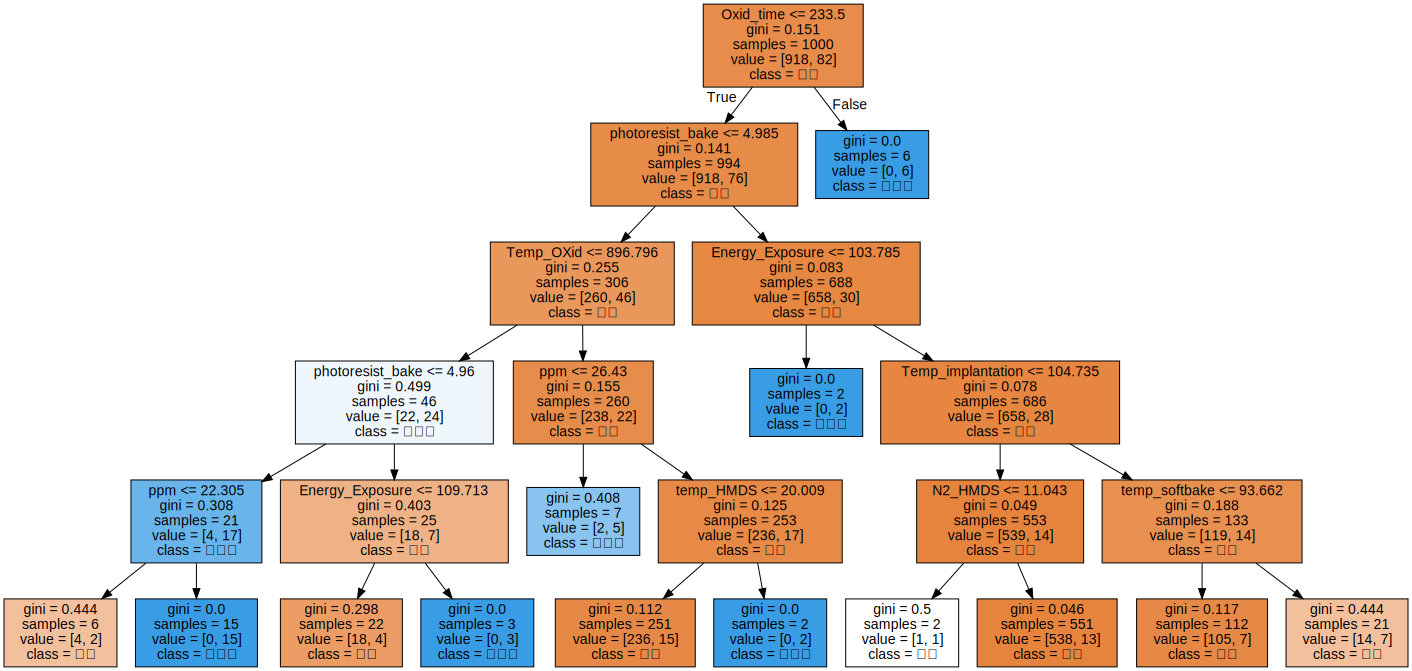

In [70]:
tree_low = DecisionTreeClassifier(max_depth = 5, min_samples_split = 20, random_state =1004)
tree_low.fit(df_train_x, df_train_y)

export_graphviz(tree_low,out_file = "tree_low.dot", class_names = ["양품","불량품"], feature_names = v_feature_name, impurity = True, filled = True)
with open("tree_low.dot")as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

In [71]:
train_accuracy = []; test_accuracy = []
para_leaf = [n_leaf*1 for n_leaf in range(5,16)]
for v_min_samples_leaf in para_leaf:
    tree = DecisionTreeClassifier(min_samples_leaf = v_min_samples_leaf, min_samples_split = 20, max_depth = 5, random_state = 1004)
    tree.fit(df_train_x,df_train_y)
    train_accuracy.append(tree.score(df_train_x,df_train_y))
    test_accuracy.append(tree.score(df_test_x,df_test_y))
    
df_accuracy_leaf = pd.DataFrame()
df_accuracy_leaf["MinSamplesLeaf"] = para_leaf
df_accuracy_leaf["TrainAccuracy"] = train_accuracy
df_accuracy_leaf["TestAccuracy"] = test_accuracy

In [75]:
df_accuracy_leaf.round(3)
# 7 선택


,MinSamplesLeaf,TrainAccuracy,TestAccuracy
0,5,0.943,0.928
1,6,0.942,0.936
2,7,0.941,0.937
3,8,0.940,0.936
4,9,0.938,0.940
5,10,0.938,0.940
6,11,0.938,0.940
7,12,0.938,0.940
8,13,0.937,0.940
9,14,0.935,0.939


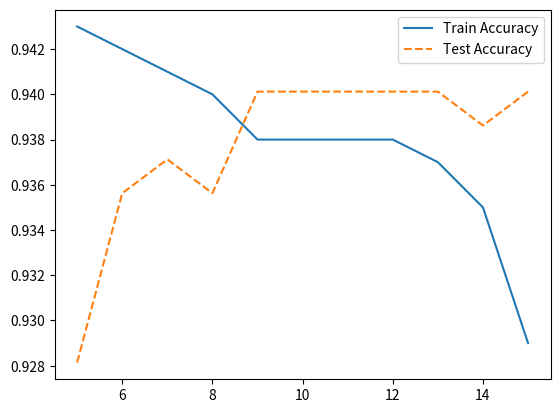

In [76]:
plt.plot(para_leaf, train_accuracy,linestyle = "-", label = "Train Accuracy")
plt.plot(para_leaf, test_accuracy,linestyle = "--", label = "Test Accuracy")
plt.legend()

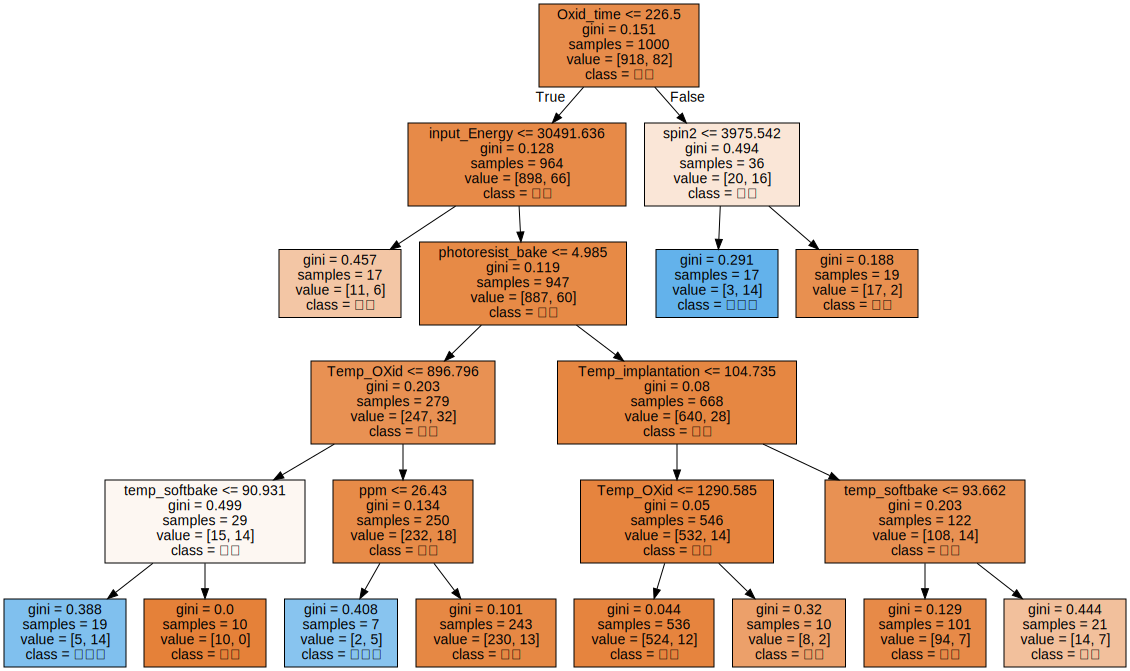

In [77]:
tree_high = DecisionTreeClassifier(max_depth = 5,min_samples_split = 20,min_samples_leaf = 7, random_state =1004)
tree_high.fit(df_train_x, df_train_y)

export_graphviz(tree_high,out_file = "tree_high.dot", class_names = ["양품","불량품"], feature_names = v_feature_name, impurity = True, filled = True)
with open("tree_high.dot")as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

In [78]:
tree_final = DecisionTreeClassifier(max_depth = 5, min_samples_split=20, min_samples_leaf = 7 , random_state =1004)
tree_final.fit(df_train_x,df_train_y)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=7, min_samples_split=20,
                       random_state=1004)

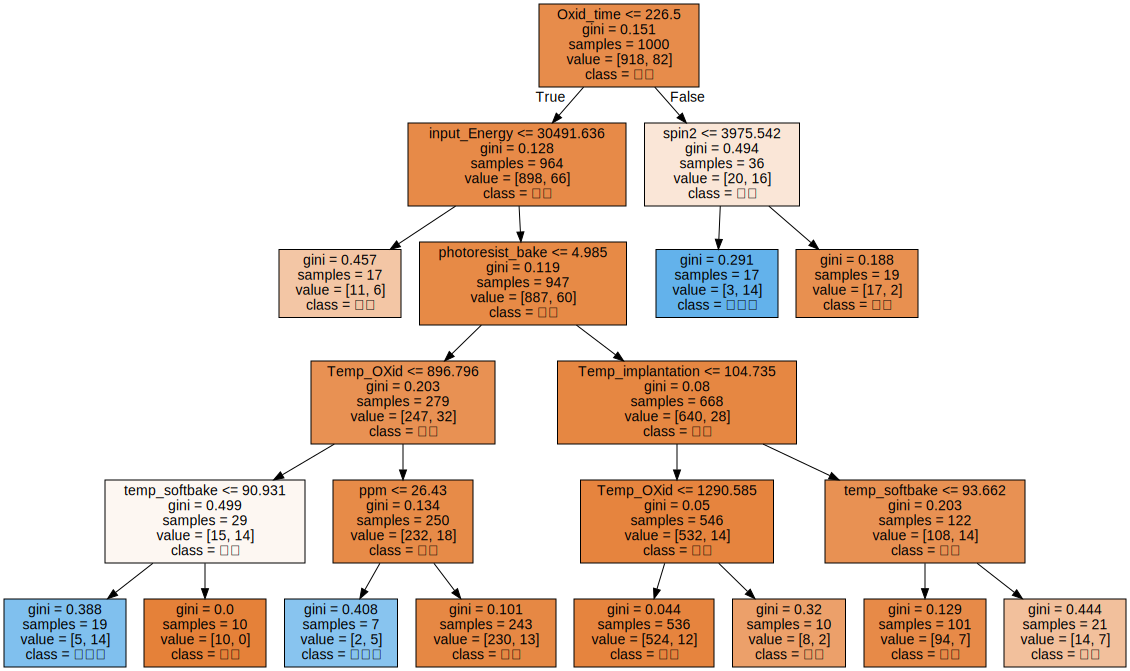

In [79]:
export_graphviz(tree_final, out_file = "tree_final.dot", class_names = ["양품","불량품"],feature_names = v_feature_name, impurity = True, filled = True)
with open("tree_final.dot")as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

In [80]:
# 평가
y_pred = tree_final.predict(df_test_x)
print("Test Accurancy:{0:.3f}\n".format(tree_final.score(df_test_x, df_test_y)))
print("Test Confusion matrix:\n{}".format(confusion_matrix(df_test_y,y_pred)))

Test Accurancy:0.937

Test Confusion matrix:
[[616  13]
 [ 29  10]]


In [81]:
print(classification_report(df_test_y,y_pred,digits = 3))

              precision    recall  f1-score   support

           0      0.955     0.979     0.967       629
           1      0.435     0.256     0.323        39

    accuracy                          0.937       668
   macro avg      0.695     0.618     0.645       668
weighted avg      0.925     0.937     0.929       668



In [82]:
df_importance = pd.DataFrame()
df_importance["Feature"] = v_feature_name
df_importance["Importance"] = tree_final.feature_importances_

In [83]:
df_importance.sort_values("Importance", ascending = False, inplace =True)
df_importance.round(3)

,Feature,Importance
5,Oxid_time,0.195
15,temp_softbake,0.189
2,Temp_OXid,0.186
12,spin2,0.184
3,ppm,0.118
21,input_Energy,0.056
14,photoresist_bake,0.041
22,Temp_implantation,0.031
23,Furance_Temp,0.000
20,Source_Power,0.000


Text(0, 0.5, '설명변수')

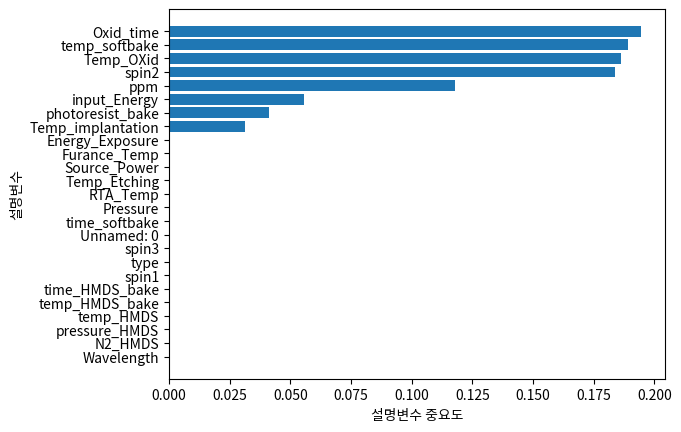

In [84]:
df_importance.sort_values("Importance", ascending = True, inplace =True)
coordinates = range(len(df_importance))
plt.barh(y = coordinates, width = df_importance["Importance"])
plt.yticks(coordinates,df_importance["Feature"])
plt.xlabel("설명변수 중요도")
plt.ylabel("설명변수")

In [129]:
# grid search
estimator = DecisionTreeClassifier()

param_grid = {"max_depth" : para_depth, "min_samples_split":para_split,"min_samples_leaf" : para_leaf}

grid_dt = GridSearchCV(estimator, param_grid, scoring = "accuracy", n_jobs = -1)
grid_dt.fit(df_train_x, df_train_y)

print("best estimator model : \n{}".format(grid_dt.best_estimator_))
print("\nbest parameter : \n{}".format(grid_dt.best_params_))
print("\nbest score : \n{}".format(grid_dt.best_score_.round(3)))

best estimator model : 
DecisionTreeClassifier(max_depth=6, min_samples_leaf=7, min_samples_split=20)

best parameter : 
{'max_depth': 6, 'min_samples_leaf': 7, 'min_samples_split': 20}

best score : 
0.928


## 오버샘플링

In [85]:
df_raw_x = df.drop("Error", axis = 1, inplace = False)
df_raw_y = df["Error"]

# train_test_split(X: 설명변수 데이터, Y: 목표변수 데이터, test_size = test 데이터 비율, random_state: 랜덤)
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(\
  df_raw_x, df_raw_y, test_size = 0.4, random_state = 1004)

print("분할 전 설명변수 데이터:", df_raw_x.shape)
print("분할 후 설명변수 데이터 : Train", df_train_x.shape," Test", df_test_x.shape)
# test와 train으로 나눔

분할 전 설명변수 데이터: (1668, 25)
분할 후 설명변수 데이터 : Train (1000, 25)  Test (668, 25)


In [86]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(sampling_strategy='auto')

x_resample, y_resample = sm.fit_resample(df_train_x, df_train_y)

print('Over-sampling 전:\n', df_train_y.value_counts(),"\n")
print('Over-Sampling 후 Train X:{}'.format(x_resample.shape))
print('Over-Sampling 후 Train Y:{}'.format(y_resample.shape))
print("Over-Sampling 후 '1' : {}".format(sum(y_resample==1)))
print("Over-Sampling 후 '0':{}".format(sum(y_resample==0)))

Over-sampling 전:
 0    918
1     82
Name: Error, dtype: int64 

Over-Sampling 후 Train X:(1836, 25)
Over-Sampling 후 Train Y:(1836,)
Over-Sampling 후 '1' : 918
Over-Sampling 후 '0':918


In [87]:
tree_uncust = DecisionTreeClassifier(random_state = 1004)
tree_uncust.fit(x_resample, y_resample)
print("Accuracy on training set: {:.3f}".format(tree_uncust.score(x_resample, y_resample)))
print("Accuracy on test set:{:.3f}".format(tree_uncust.score(df_test_x, df_test_y)))

Accuracy on training set: 1.000
Accuracy on test set:0.900


In [88]:
train_accuracy = []; test_accuracy = []
para_depth = [depth for depth in range(1,12)]
for v_max_depth in para_depth:
    tree = DecisionTreeClassifier(max_depth = v_max_depth, random_state = 1004)
    tree.fit(x_resample, y_resample)
    train_accuracy.append(tree.score(x_resample, y_resample))
    test_accuracy.append(tree.score(df_test_x,df_test_y))
    
df_accuracy_depth = pd.DataFrame()
df_accuracy_depth["Depth"] = para_depth
df_accuracy_depth["TrainAccuracy"] = train_accuracy
df_accuracy_depth["TestAccuracy"] = test_accuracy

In [89]:
df_accuracy_depth.round(3)
# 7 선택

,Depth,TrainAccuracy,TestAccuracy
0,1,0.653,0.702
1,2,0.678,0.919
2,3,0.701,0.795
3,4,0.789,0.856
4,5,0.841,0.789
5,6,0.881,0.823
6,7,0.900,0.891
7,8,0.926,0.880
8,9,0.958,0.841
9,10,0.975,0.879


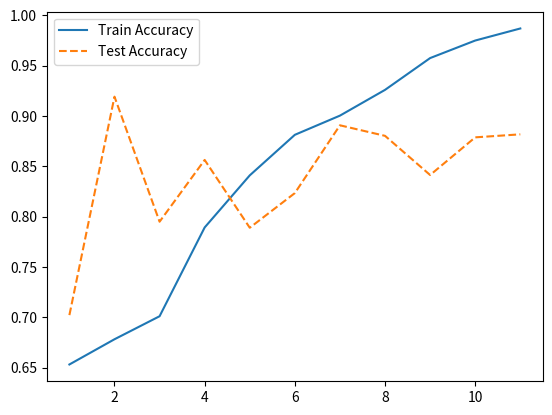

In [90]:
plt.plot(para_depth, train_accuracy,linestyle = "-", label = "Train Accuracy")
plt.plot(para_depth, test_accuracy,linestyle = "--", label = "Test Accuracy")
plt.legend()

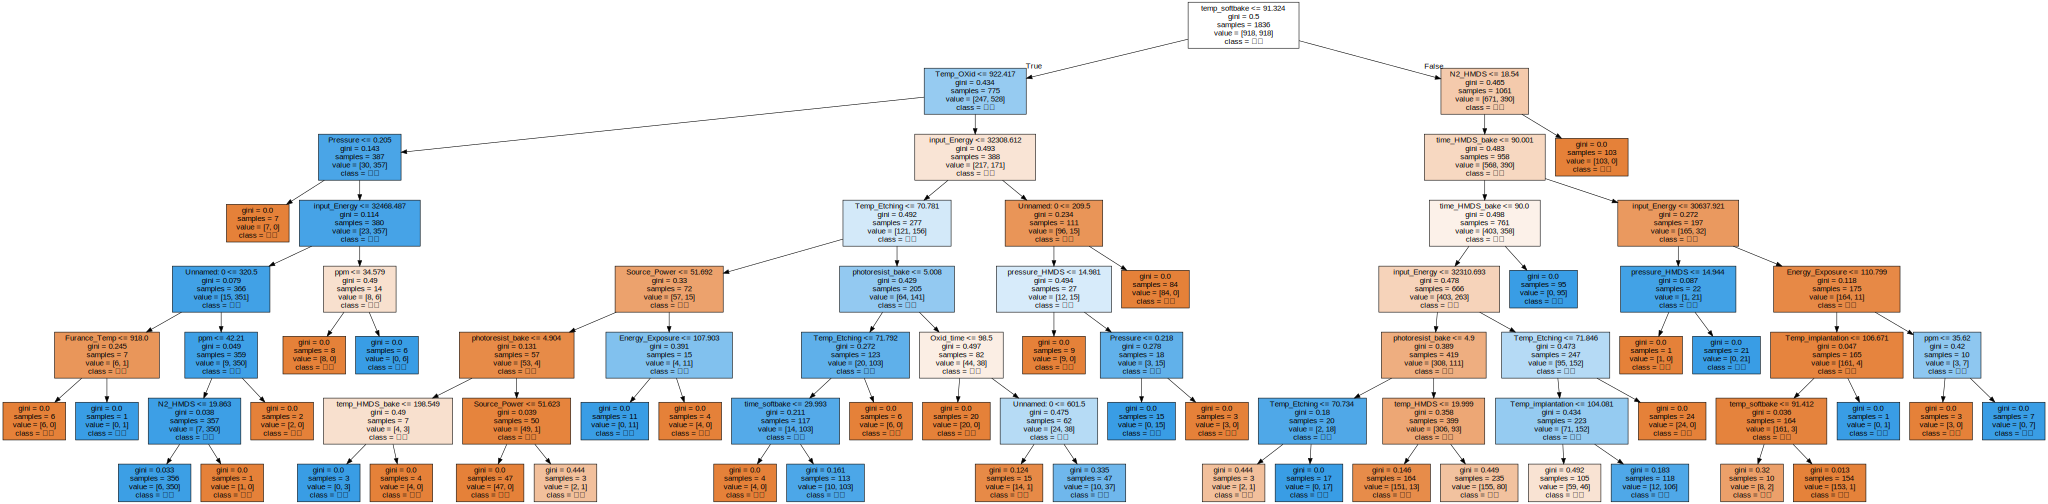

In [91]:
v_feature_name = df_train_x.columns

tree_low = DecisionTreeClassifier(max_depth = 7, random_state =1004)
tree_low.fit(x_resample, y_resample)

export_graphviz(tree_low,out_file = "tree_low.dot", class_names = ["양품","불량"], feature_names = v_feature_name, impurity = True, filled = True)
with open("tree_low.dot")as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

In [92]:
# 분리 노드의 최소 자류 수 변경에 따른 모델 성능 비교를 위한 전체 자료 수 고려
print("전체 자료 = ", df_train_x.shape[0],"개")
print("전체 자료의 1% =",df_train_x.shape[0]*0.01,"개")

train_accuracy = []; test_accuracy = []
para_split = [n_split*10 for n_split in range(2,60)]

# min_sampled_splig 조정
for v_min_samples_split in para_split:
    tree = DecisionTreeClassifier(min_samples_split = v_min_samples_split,max_depth = 7,random_state =1004)
    tree.fit(df_train_x,df_train_y)
    train_accuracy.append(tree.score(x_resample, y_resample))
    test_accuracy.append(tree.score(df_test_x,df_test_y))
    
df_accuracy_split = pd.DataFrame()
df_accuracy_split["MinSamplesSplit"] = para_split
df_accuracy_split["TrainAccuracy"] = train_accuracy
df_accuracy_split["TestAccuracy"] = test_accuracy

전체 자료 =  1000 개
전체 자료의 1% = 10.0 개


In [93]:
df_accuracy_split.round(3)
# 유의미한 결과를 위해 20 선택

,MinSamplesSplit,TrainAccuracy,TestAccuracy
0,20,0.688,0.930
1,30,0.676,0.922
2,40,0.676,0.922
3,50,0.703,0.915
4,60,0.703,0.915
5,70,0.703,0.915
6,80,0.703,0.915
7,90,0.703,0.915
8,100,0.703,0.915
9,110,0.703,0.915


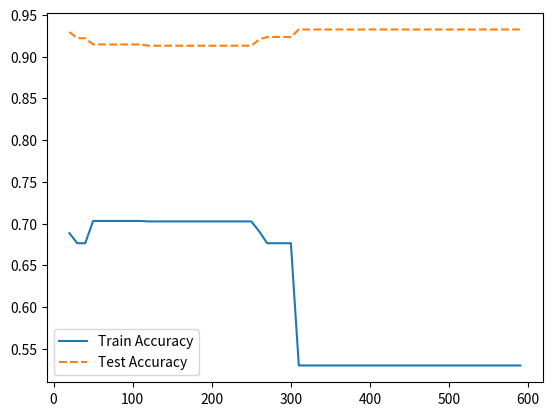

In [94]:
plt.plot(para_split, train_accuracy,linestyle = "-", label = "Train Accuracy")
plt.plot(para_split, test_accuracy,linestyle = "--", label = "Test Accuracy")
plt.legend()

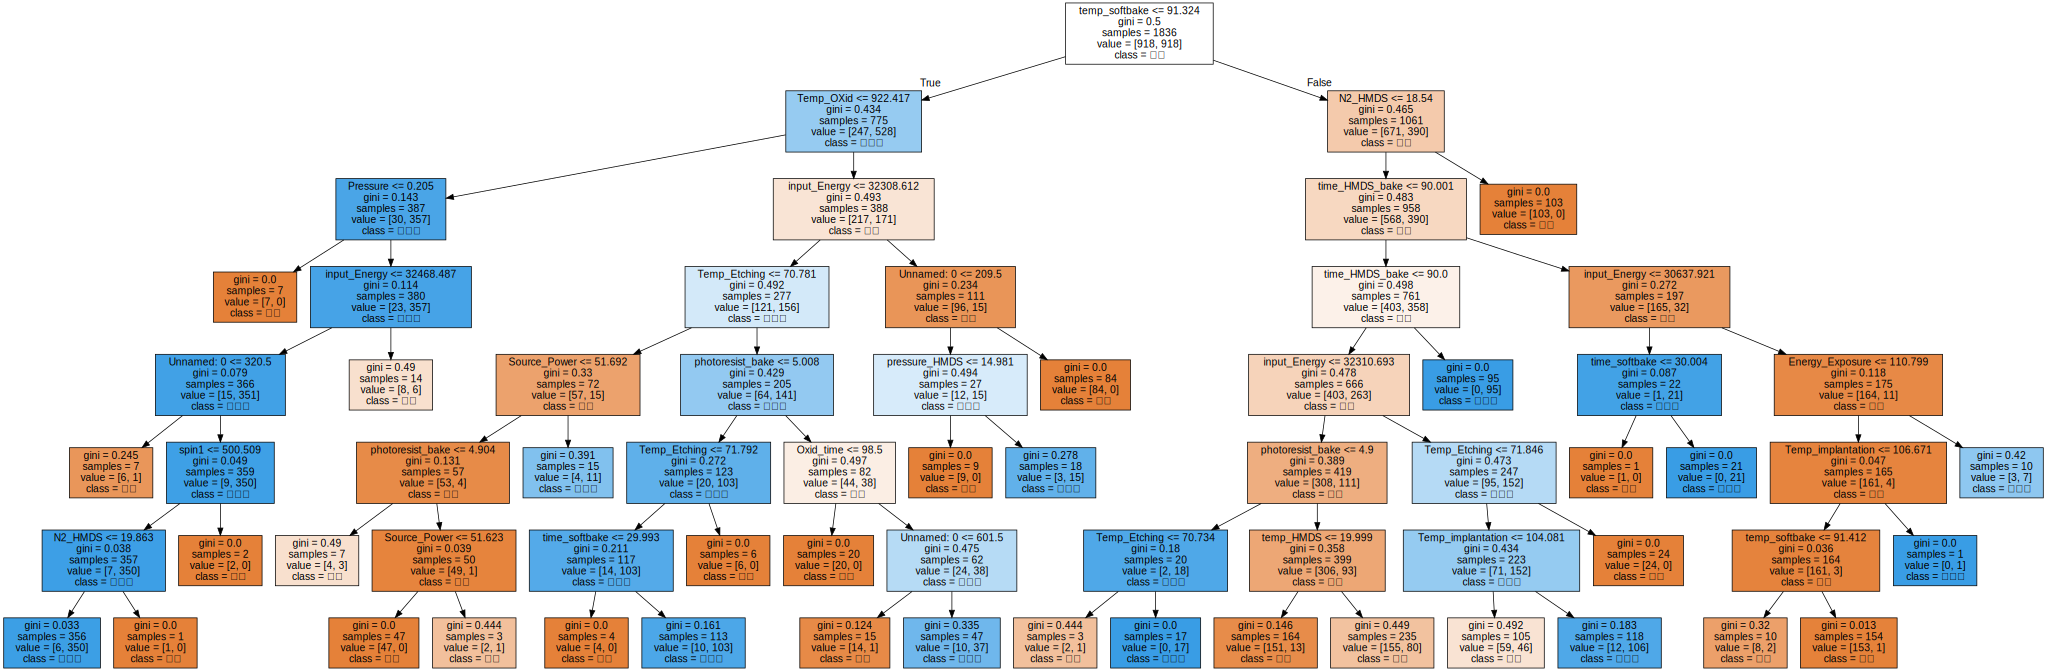

In [95]:
tree_low = DecisionTreeClassifier(max_depth = 7, min_samples_split = 20, random_state =1004)
tree_low.fit(x_resample, y_resample)

export_graphviz(tree_low,out_file = "tree_low.dot", class_names = ["양품","불량품"], feature_names = v_feature_name, impurity = True, filled = True)
with open("tree_low.dot")as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

In [96]:
train_accuracy = []; test_accuracy = []
para_leaf = [n_leaf*1 for n_leaf in range(5,16)]
for v_min_samples_leaf in para_leaf:
    tree = DecisionTreeClassifier(min_samples_leaf = v_min_samples_leaf, min_samples_split = 20, max_depth = 7, random_state = 1004)
    tree.fit(x_resample, y_resample)
    train_accuracy.append(tree.score(x_resample, y_resample))
    test_accuracy.append(tree.score(df_test_x,df_test_y))
    
df_accuracy_leaf = pd.DataFrame()
df_accuracy_leaf["MinSamplesLeaf"] = para_leaf
df_accuracy_leaf["TrainAccuracy"] = train_accuracy
df_accuracy_leaf["TestAccuracy"] = test_accuracy

In [98]:
df_accuracy_leaf.round(3)
# 7 선택


,MinSamplesLeaf,TrainAccuracy,TestAccuracy
0,5,0.885,0.879
1,6,0.885,0.879
2,7,0.885,0.879
3,8,0.882,0.873
4,9,0.880,0.874
5,10,0.879,0.874
6,11,0.877,0.874
7,12,0.877,0.874
8,13,0.874,0.865
9,14,0.874,0.867


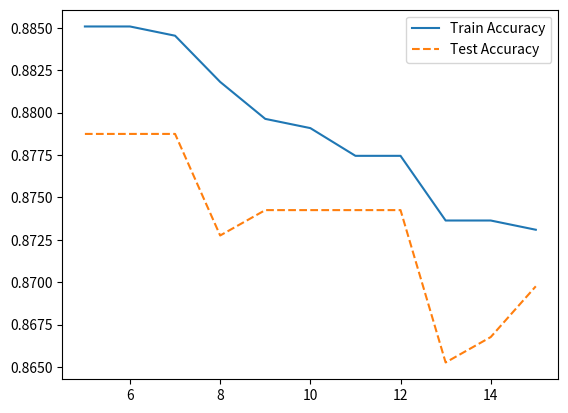

In [99]:
plt.plot(para_leaf, train_accuracy,linestyle = "-", label = "Train Accuracy")
plt.plot(para_leaf, test_accuracy,linestyle = "--", label = "Test Accuracy")
plt.legend()

In [100]:
tree_final = DecisionTreeClassifier(max_depth = 7, min_samples_split=20, min_samples_leaf =7 , random_state =1004)
tree_final.fit(df_train_x,df_train_y)

DecisionTreeClassifier(max_depth=7, min_samples_leaf=7, min_samples_split=20,
                       random_state=1004)

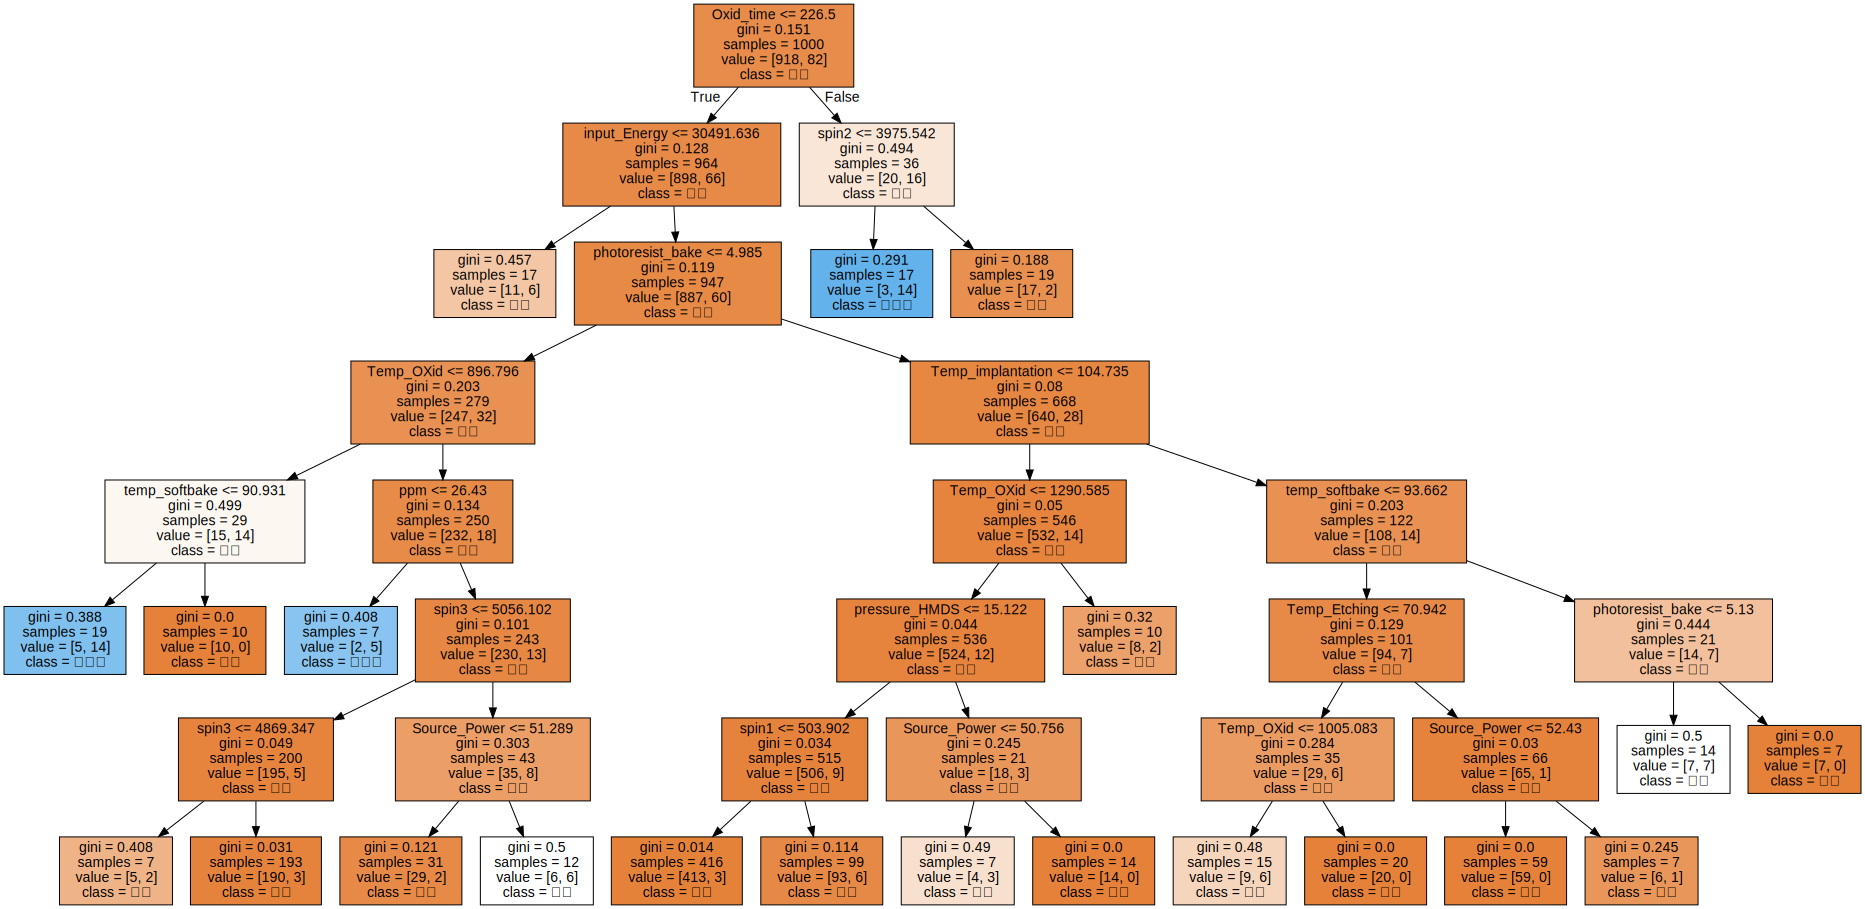

In [101]:
export_graphviz(tree_final, out_file = "tree_final.dot", class_names = ["양품","불량품"],feature_names = v_feature_name, impurity = True, filled = True)
with open("tree_final.dot")as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

In [102]:
y_pred = tree_final.predict(df_test_x)
print("Test Accurancy:{0:.3f}\n".format(tree_final.score(df_test_x, df_test_y)))
print("Test Confusion matrix:\n{}".format(confusion_matrix(df_test_y,y_pred)))

Test Accurancy:0.937

Test Confusion matrix:
[[616  13]
 [ 29  10]]


In [103]:
print(classification_report(df_test_y,y_pred,digits = 3))

              precision    recall  f1-score   support

           0      0.955     0.979     0.967       629
           1      0.435     0.256     0.323        39

    accuracy                          0.937       668
   macro avg      0.695     0.618     0.645       668
weighted avg      0.925     0.937     0.929       668



In [104]:
df_importance = pd.DataFrame()
df_importance["Feature"] = v_feature_name
df_importance["Importance"] = tree_final.feature_importances_

In [105]:
df_importance.sort_values("Importance", ascending = False, inplace =True)
df_importance.round(3)

,Feature,Importance
2,Temp_OXid,0.184
5,Oxid_time,0.149
15,temp_softbake,0.145
12,spin2,0.141
3,ppm,0.090
20,Source_Power,0.080
14,photoresist_bake,0.067
13,spin3,0.043
21,input_Energy,0.043
22,Temp_implantation,0.024


Text(0, 0.5, '설명변수')

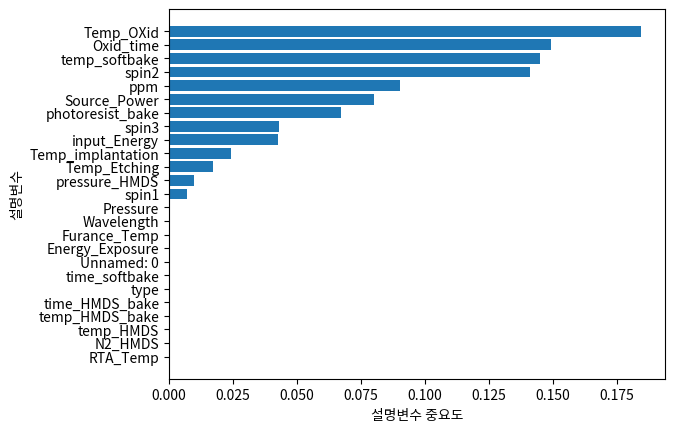

In [106]:
df_importance.sort_values("Importance", ascending = True, inplace =True)
coordinates = range(len(df_importance))
plt.barh(y = coordinates, width = df_importance["Importance"])
plt.yticks(coordinates,df_importance["Feature"])
plt.xlabel("설명변수 중요도")
plt.ylabel("설명변수")

In [107]:
# grid search
estimator = DecisionTreeClassifier()

param_grid = {"max_depth" : para_depth, "min_samples_split":para_split,"min_samples_leaf" : para_leaf}

grid_dt = GridSearchCV(estimator, param_grid, scoring = "accuracy", n_jobs = -1)
grid_dt.fit(x_resample, y_resample)

print("best estimator model : \n{}".format(grid_dt.best_estimator_))
print("\nbest parameter : \n{}".format(grid_dt.best_params_))
print("\nbest score : \n{}".format(grid_dt.best_score_.round(3)))

best estimator model : 
DecisionTreeClassifier(max_depth=11, min_samples_leaf=5, min_samples_split=20)

best parameter : 
{'max_depth': 11, 'min_samples_leaf': 5, 'min_samples_split': 20}

best score : 
0.865
